In [1]:
import pandas as pd

In [2]:
hr_match = pd.read_csv('../../datasets/play-by-play-study/match_attributes.csv',index_col=0)
events = pd.read_csv('../../datasets/play-by-play-study/events_arrojeria.csv',index_col=0)

In [3]:
hr_match

,seconds,date,hr,activity_load_2d,activity_load_3d,IsOnCourt
0,3262.304,2023-04-23 18:10:38.770,113.0,0.0218,0.0352,0.0
1,3263.304,2023-04-23 18:10:38.770,112.0,0.0310,0.0393,0.0
2,3264.304,2023-04-23 18:10:38.770,112.0,0.0232,0.0340,0.0
3,3265.304,2023-04-23 18:10:38.770,112.0,0.0202,0.0263,0.0
4,3266.304,2023-04-23 18:10:38.770,112.0,0.0228,0.0259,0.0
...,...,...,...,...,...,...
4860,8122.304,NaN,112.0,0.0071,0.0099,1.0
4861,8123.304,2023-04-23 18:10:38.770,114.0,0.0166,0.0216,1.0
4862,8124.304,2023-04-23 18:10:38.770,114.0,0.0110,0.0154,1.0
4863,8125.304,2023-04-23 18:10:38.770,113.0,0.0280,0.0370,1.0


In [4]:
hr_match = hr_match[~hr_match['IsOnCourt'].isnull()]

In [5]:
events

,seconds,is_on_court,event,offense_player,defense_player,positive_play
989,990.0,1.0,LOST_BALL,03-E. ARROJERIA,,0
1214,1215.0,0.0,FOUL_RECEIVE,13-M.BRASIL,03-E. ARROJERIA,0
1335,1336.0,1.0,FOUL_RECEIVE,14-O. VEGUE,03-E. ARROJERIA,0
1365,1366.0,1.0,7M_PROVOKE_SUSPENSION,03-E. ARROJERIA,28-J.CASTAÑERA,1
1513,1514.0,1.0,FOUL_RECEIVE,98-M. CAPDEVILA,03-E. ARROJERIA,0
1608,1609.0,1.0,GOAL,03-E. ARROJERIA,01-N. WIGGINS,1
1623,1624.0,1.0,FOUL_RECEIVE,09-L.KOFLER,03-E. ARROJERIA,0
1771,1772.0,1.0,FOUL_RECEIVE,13-M.BRASIL,03-E. ARROJERIA,0
1788,1789.0,1.0,GOAL,03-E. ARROJERIA,01-N. WIGGINS,1
1863,1864.0,1.0,FOUL_RECEIVE,03-E. ARROJERIA,23-A.GONZALEZ,1


In [6]:
hr_match['IsOnCourt'].unique()

array([0., 1.])

In [ ]:
for 

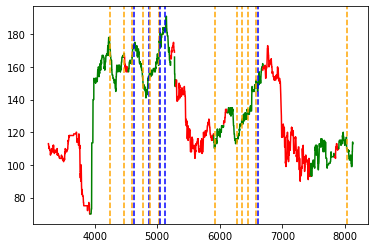

In [22]:
import matplotlib.pyplot as plt

colores = {0: 'red', 1: 'green', None: 'black'}
x = hr_match['seconds']
y = hr_match['hr']

valores_convertidos = [colores[valor] for valor in hr_match['IsOnCourt']]

# Crear una figura y ejes
fig, ax = plt.subplots()

# Initialize variables for segment plotting
segment_start = 0
current_color = valores_convertidos[0]

# Iterate through the data to plot segments with different colors
for i in range(1, len(x)):
    if valores_convertidos[i] != current_color:
        # Plot the current segment with the current color
        ax.plot(x[segment_start:i], y[segment_start:i], linestyle='-', color=current_color)
        
        # Update the segment start and current color
        segment_start = i
        current_color = valores_convertidos[i]

# Plot the last segment
ax.plot(x[segment_start:], y[segment_start:], linestyle='-', color=current_color)
color_event = {0: 'orange', 1: 'b'}
for index, row in events.iterrows():
    
    ax.axvline(x=row['seconds'] + 3262, color=color_event[row['positive_play']], linestyle='--', label='Vertical Line at x=2')



plt.show()